<a href="https://colab.research.google.com/github/UrsusV/dataTomFoolery/blob/main/output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('/content/e_commerce_data_10k.csv')
print(df.info())

# Display summary statistics of numerical columns
print(df.describe())

# Display the first few rows of the DataFrame
print(df.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   transaction_date_time  10000 non-null  object 
 2   payment_key            10000 non-null  object 
 3   customer_key           10000 non-null  object 
 4   time_key               10000 non-null  object 
 5   item_key               10000 non-null  object 
 6   store_key              10000 non-null  object 
 7   item_name              10000 non-null  object 
 8   item_description       10000 non-null  object 
 9   customer_name          9961 non-null   object 
 10  customer_upazila       10000 non-null  object 
 11  customer_district      10000 non-null  object 
 12  customer_division      10000 non-null  object 
 13  quarter                10000 non-null  object 
 14  store_size             10000 non-null  object 
 15  sto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

<ipython-input-4-60f7b27e5237>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
<ipython-input-4-60f7b27e5237>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


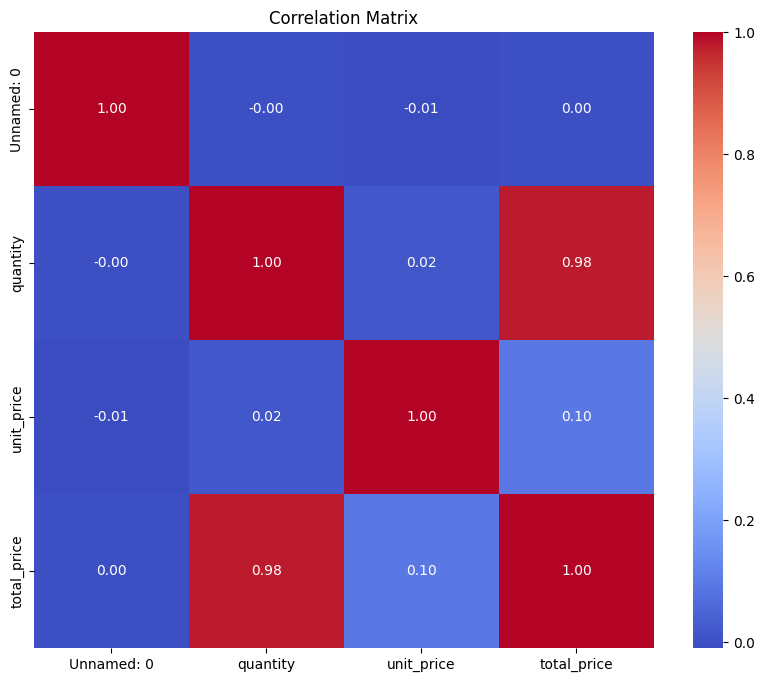

In [4]:
correlation_matrix = df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with null values
df_cleaned = df.dropna()

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

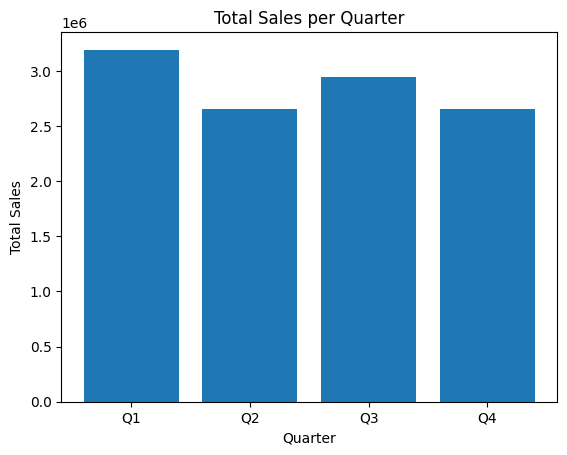

In [5]:

sales_by_quarter = df.groupby('quarter')['total_price'].sum()


plt.bar(sales_by_quarter.index, sales_by_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales per Quarter')
plt.show()


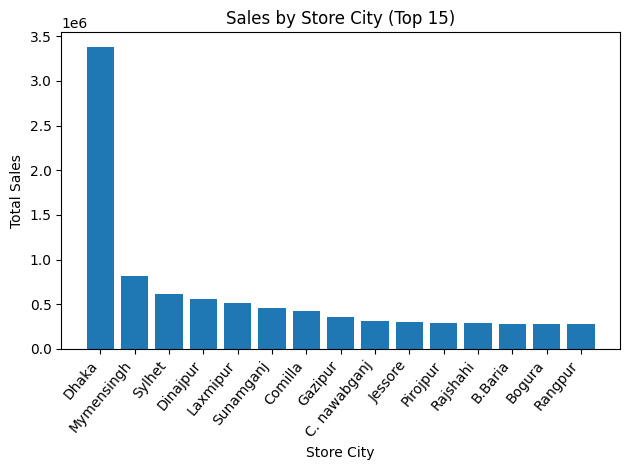

In [13]:
sales_by_store_city = df.groupby('store_city')['total_price'].sum()

# Get top 15 store cities (adjust this if needed)
top_15_sales_by_city = sales_by_store_city.nlargest(15)


plt.bar(top_15_sales_by_city.index, top_15_sales_by_city.values)
plt.xlabel('Store City')
plt.ylabel('Total Sales')
plt.title('Sales by Store City (Top 15)')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

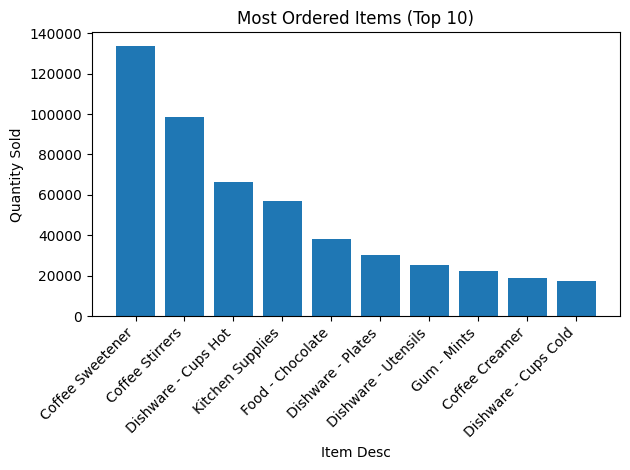

In [14]:

items_ordered = df.groupby('item_description')['quantity'].sum()

# Sort items by quantity in descending order
top_items = items_ordered.sort_values(ascending=False)

# Get the top 10 (or adjust as needed)
top_10_items = top_items.head(10)

# Create a bar chart
plt.bar(top_10_items.index, top_10_items.values)
plt.xlabel('Item Desc')
plt.ylabel('Quantity Sold')
plt.title('Most Ordered Items (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

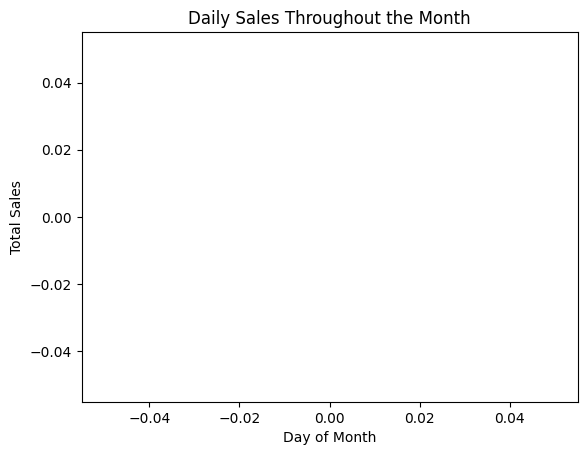

In [16]:
df['Date'] = pd.to_datetime(df['transaction_date_time'], format='%d-%m-%y %H:%M:%S', errors='coerce')

# Extract the day of the month from the 'Date' column
df['Day_of_Month'] = df['Date'].dt.day

# Group by day of month and sum total price
daily_sales = df.groupby('Day_of_Month')['total_price'].sum()

# Plot the results
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Day of Month')
plt.ylabel('Total Sales')
plt.title('Daily Sales Throughout the Month')
plt.show()

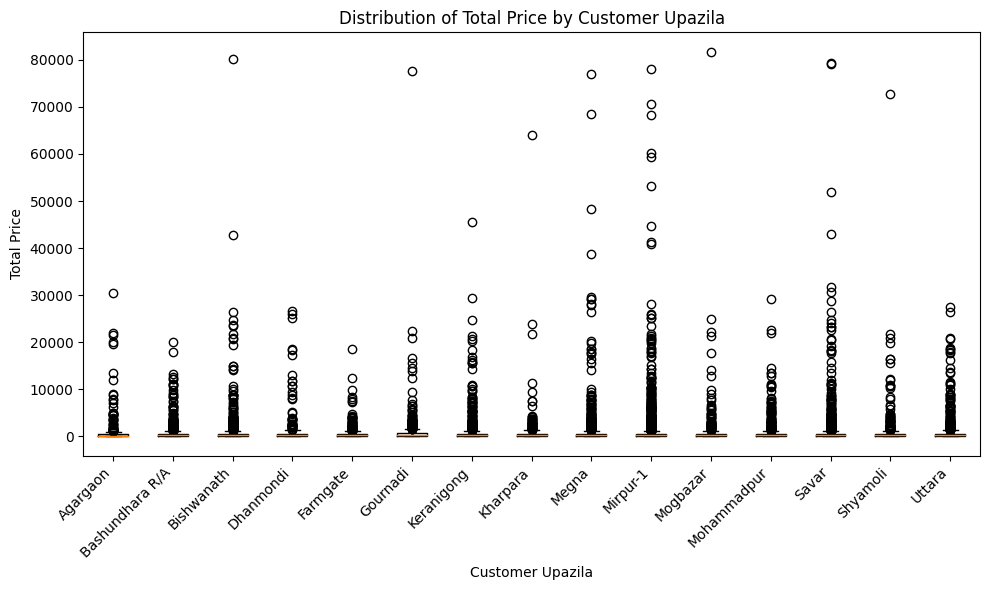

In [18]:

grouped_by_upazila = df.groupby('customer_upazila')['total_price']

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10,6))

# Create box plots
ax.boxplot([group for name, group in grouped_by_upazila])


ax.set_xticklabels(grouped_by_upazila.groups.keys())
ax.set_xlabel('Customer Upazila')
ax.set_ylabel('Total Price')
ax.set_title('Distribution of Total Price by Customer Upazila')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()